# 3D Modeling & Simulations in Bioinformatcis -- CS06F
## National University of Computer & Emerging Sciences Islamabad
### Assignment: Monti Carlo Simulation of 2D-HP Model
#### ZEESHAN ALI, I14-1623, BS(CS)
##### (Instructor: Dr. Hammad Naveed)

<img src="screen.png">

In [1]:
from graphics import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 30 # n is the order of box that we fit our protiens in.

d = 10 # d is the diameter of circle and / or shortest distance between two circles

shift_x = 10

# win_length and win_width are the length and width of window respectively
win_length, win_width = (2*n-1)*d + (2*(shift_x+1)*d), (2*n-1)*d

print win_length, win_width

810 590


## Protien Sequences

<img src="protiens.png">

In [3]:
STRING_01 = "HP"*2+"P"+"H"*2+"P"+"H"+"P"*2+"H"+"P"+"H"*2+"P"*2+"HPH"
STRING_02 = "H"*2+("P"*2+"H")*7+"H"
STRING_03 = "P"*2+"H"+"P"*2+("H"*2+"P"*4)*3+"H"*2
STRING_04 = "P"*3+"H"*2+"P"*2+"H"*2+"P"*5+"H"*7+"P"*2+"H"*2+"P"*4+"H"*2+"P"*2+"H"+"P"*2
STRING_05 = "P"*2+"H"+("P"*2+"H"*2)*2+"P"*5+"H"*10+"P"*6+("P"*2+"H"*2)*2+"H"+"P"*2+"H"*5
STRING_06 = "H"*2+"PH"*3+"P"+"H"*4+"PH"+("P"*3+"H")*2+"P"*4+"H"+("P"*3+"H")*2+"PHP"+"H"*4+"HP"*3+"H"*2
STRING_07 = "PPHHHPHHHHHHHHPPPHHHHHHHHHHPHPPPHHHHHHHHHHHHPPPPHHHHHHPHHPHP"
STRING_08 = "H"*12+"PH"*2+"PPHH"*2+"PPHPPHHPPHHPPHPPHHPPHHPPHPHP"+"H"*12
STRING_09 = "HHHHPPPPHHHHHHHHHHHHPPPPPP"+("H"*12+"P"*3)*3+"HPPHHPPHHPPHPH"
STRING_10 = "PPPHHPPHHHHPPHHHPHHPHHPHHHHPPPPPPPPHHHHHHPPHHHHHHPPPPPPPPPHPHHPHHHHHHHHHHHPPHHHPHHPHPPHPHHHPPPPPPHHH"
STRING_11 = "PPPPPPHPHHPPPPPHHHPHHHHHPHHPPPPHHPPHHPHHHHHPHHHHHHHHHHPHHPHHHHHHHPPPPPPPPPPPHHHHHHHPPHPHHHPPPPPPHPHH"

print len(STRING_01), STRING_01
print len(STRING_02), STRING_02
print len(STRING_03), STRING_03
print len(STRING_04), STRING_04
print len(STRING_05), STRING_05
print len(STRING_06), STRING_06
print len(STRING_07), STRING_07
print len(STRING_08), STRING_08
print len(STRING_09), STRING_09
print len(STRING_10), STRING_10
print len(STRING_11), STRING_11

STRING = STRING_11
STRING_LENGTH = len(STRING)
print
print "STRING_LENGTH:", STRING_LENGTH, "STRING:",STRING

20 HPHPPHHPHPPHPHHPPHPH
24 HHPPHPPHPPHPPHPPHPPHPPHH
25 PPHPPHHPPPPHHPPPPHHPPPPHH
36 PPPHHPPHHPPPPPHHHHHHHPPHHPPPPHHPPHPP
48 PPHPPHHPPHHPPPPPHHHHHHHHHHPPPPPPPPHHPPHHHPPHHHHH
51 HHPHPHPHPHHHHPHPPPHPPPHPPPPHPPPHPPPHPHPHHHHHPHPHPHH
60 PPHHHPHHHHHHHHPPPHHHHHHHHHHPHPPPHHHHHHHHHHHHPPPPHHHHHHPHHPHP
64 HHHHHHHHHHHHPHPHPPHHPPHHPPHPPHHPPHHPPHPPHHPPHHPPHPHPHHHHHHHHHHHH
85 HHHHPPPPHHHHHHHHHHHHPPPPPPHHHHHHHHHHHHPPPHHHHHHHHHHHHPPPHHHHHHHHHHHHPPPHPPHHPPHHPPHPH
100 PPPHHPPHHHHPPHHHPHHPHHPHHHHPPPPPPPPHHHHHHPPHHHHHHPPPPPPPPPHPHHPHHHHHHHHHHHPPHHHPHHPHPPHPHHHPPPPPPHHH
100 PPPPPPHPHHPPPPPHHHPHHHHHPHHPPPPHHPPHHPHHHHHPHHHHHHHHHHPHHPHHHHHHHPPPPPPPPPPPHHHHHHHPPHPHHHPPPPPPHPHH

STRING_LENGTH: 100 STRING: PPPPPPHPHHPPPPPHHHPHHHHHPHHPPPPHHPPHHPHHHHHPHHHHHHHHHHPHHPHHHHHHHPPPPPPPPPPPHHHHHHHPPHPHHHPPPPPPHPHH


In [4]:
x_i = lambda i: d/2.0 + (i-1)*(2*d)
y_j = lambda j: d/2.0 + (j-1)*(2*d)

In [5]:
def find(rp, pair):
    '''
    Input:
        rp=[[x1, y1], [x2, y2], [x3, y3], ..., [xn, yn]]
        pair=(a,b)
    
    Output:
        TRUE: pair belongs to rp
        FALSE: otherwise
    '''
    for idx in range(len(rp)):
        if rp[idx][0] == pair[0] and rp[idx][1] == pair[1]:
            return True
    return False

In [6]:
def rand_init(rp, start, dead_ends):
    directions = ['L', 'R', 'U', 'D']
    for i in range(start, STRING_LENGTH):
        np.random.shuffle(directions)
        for d in [0, 1, 2, 3]:
            if directions[d] == 'L' and rp[i-1][0] > 0:
                rp[i][1] = rp[i-1][1]
                rp[i][0] = rp[i-1][0] - 1
                break
            elif directions[d] == 'R' and rp[i-1][0] < n-1:
                rp[i][1] = rp[i-1][1]
                rp[i][0] = rp[i-1][0] + 1
                break
            elif directions[d] == 'U' and rp[i-1][1] > 0:
                rp[i][0] = rp[i-1][0]
                rp[i][1] = rp[i-1][1] - 1
                break
            elif directions[d] == 'D' and rp[i-1][1] < n-1:
                rp[i][0] = rp[i-1][0]
                rp[i][1] = rp[i-1][1] + 1
                break
            elif i >= 9:
                np.append(arr=dead_ends, values=rp[i-1])
                return rand_init(rp, i-1, dead_ends) # move a step back and try again
        if find(rp[:i], rp[i]): # if position is already occpied
            return rand_init(rp, i-1, dead_ends) # try again
        if find(dead_ends, rp[i]): # if position is a dead end
            return rand_init(rp, i-1, dead_ends) # move a step back and try again
    return rp

In [7]:
residue_position = np.array([(0, 0) for i in range(STRING_LENGTH)])

residue_position[0] = (np.mod(np.random.rand()*1024, n),
                       np.mod(np.random.rand()*1024, n))

# residue_position[0] = (0, np.mod(np.random.rand()*1024, n))

rand_init(residue_position, 1, np.array([]))
print len(residue_position)
print residue_position.T

100
[[ 7  7  8  9  9  8  7  6  5  5  4  3  3  2  2  3  3  3  3  3  4  4  5  6
   6  7  7  6  6  5  4  4  5  5  6  6  7  8  9 10 10 10 10  9  9  9 10 10
  11 12 12 12 12 12 13 13 13 14 14 14 15 16 17 17 16 16 16 15 14 14 14 13
  13 12 12 12 12 12 13 13 12 11 11 10 10  9  8  8  9  9 10 10 11 11 10 10
   9  9  8  8]
 [ 0  1  1  1  2  2  2  2  2  1  1  1  2  2  3  3  4  5  6  7  7  8  8  8
   7  7  6  6  5  5  5  4  4  3  3  4  4  4  4  4  5  6  7  7  8  9  9 10
  10 10  9  8  7  6  6  7  8  8  9 10 10 10 10 11 11 12 13 13 13 12 11 11
  12 12 13 14 15 16 16 17 17 17 16 16 17 17 17 16 16 15 15 14 14 13 13 12
  12 11 11 10]]


In [8]:
# Centralize the random initialization
def centralize(residue_position):
    mid_x = (np.min(residue_position.T[0]) + np.max(residue_position.T[0])) / 2
    diff = n / 2 - mid_x
    residue_position.T[0] += diff

    mid_y = (np.min(residue_position.T[1]) + np.max(residue_position.T[1])) / 2
    diff = n / 2 - mid_y
    residue_position.T[1] += diff
    
centralize(residue_position)

In [9]:
def connect_Horizontally(x1, y1, x2, y2):
    if x1 < x2:
        lineSeg = Line(Point(x1+d/2.0, y1-1),
                      Point(x2-d/2.0, y2-1))
        lineSeg.draw(win)
        lineSeg = Line(Point(x1+d/2.0, y1),
                      Point(x2-d/2.0, y2))
        lineSeg.draw(win)
        lineSeg = Line(Point(x1+d/2.0, y1+1),
                      Point(x2-d/2.0, y2+1))
        lineSeg.draw(win)
    else:
        lineSeg = Line(Point(x2+d/2.0, y1-1),
                      Point(x1-d/2.0, y2-1))
        lineSeg.draw(win)
        lineSeg = Line(Point(x2+d/2.0, y1),
                      Point(x1-d/2.0, y2))
        lineSeg.draw(win)
        lineSeg = Line(Point(x2+d/2.0, y1+1),
                      Point(x1-d/2.0, y2+1))
        lineSeg.draw(win)
    
def connect_Vertically(x1, y1, x2, y2):
    if y1 < y2:
        lineSeg = Line(Point(x1-1, y1+d/2.0),
                      Point(x2-1, y2-d/2.0))
        lineSeg.draw(win)
        lineSeg = Line(Point(x1, y1+d/2.0),
                      Point(x2, y2-d/2.0))
        lineSeg.draw(win)
        lineSeg = Line(Point(x1+1, y1+d/2.0),
                      Point(x2+1, y2-d/2.0))
        lineSeg.draw(win)
    else:
        lineSeg = Line(Point(x1-1, y2+d/2.0),
                      Point(x2-1, y1-d/2.0))
        lineSeg.draw(win)
        lineSeg = Line(Point(x1, y2+d/2.0),
                      Point(x2, y1-d/2.0))
        lineSeg.draw(win)
        lineSeg = Line(Point(x1+1, y2+d/2.0),
                      Point(x2+1, y1-d/2.0))
        lineSeg.draw(win)

In [10]:
def draw_Circles(win):
    for i in range(n):
        for j in range(n):
            c = Circle(Point(x_i(i+1), y_j(j+1)), d/2.0)
            c.draw(win)
            
def draw_Chain(win, rp):
    for i in range(len(rp)):
        c = Circle(Point(x_i(rp[i][0]+1), y_j(rp[i][1]+1)), d/2.0)
        if STRING[i] == 'P': # Polar
            c.draw(win)
            c.setFill("Red")
        else: # Hydrophobic
            c.draw(win)
            c.setFill("Blue")
            
def connect_residues(residue_position):
    for r in range(len(STRING)-1):
        if residue_position[r][0] == residue_position[r+1][0]: # Abscissa are same
            connect_Vertically(x_i(1+residue_position[r][0]), y_j(1+residue_position[r][1]),
                               x_i(1+residue_position[r+1][0]), y_j(1+residue_position[r+1][1]))
        else: # Ordinates (i.e. y-axes) are same
            connect_Horizontally(x_i(1+residue_position[r][0]), y_j(1+residue_position[r][1]), 
                                 x_i(1+residue_position[r+1][0]), y_j(1+residue_position[r+1][1]))

def draw_boundary(win):
    boundary = Rectangle(p1=Point(x_i(n)+d+0, y_j(1)+0), p2=Point(win_length-d/2.0-0, y_j(n)-0))
    boundary.draw(win)
    boundary = Rectangle(p1=Point(x_i(n)+d+1, y_j(1)+1), p2=Point(win_length-d/2.0-1, y_j(n)-1))
    boundary.draw(win)
    boundary = Rectangle(p1=Point(x_i(n)+d+2, y_j(1)+2), p2=Point(win_length-d/2.0-2, y_j(n)-2))
    boundary.draw(win)
    
def display_text(T, line=1):
    string = Text(Point(x_i(n)+12*d, y_j(line+1)), T)
    string.setStyle("bold")
    string.setFace("arial")
    string.draw(win)
    
def draw_interface(win):
    win.setBackground("white")

    draw_boundary(win)

    display_text("MONTI-CARLO", line=4)
    display_text("SIMULATION", line=6)
    display_text("OF", line=8)
    display_text("HP-MODEL", line=10)

    h = Circle(Point(x_i(n)+3*d, y_j(n-5)), d/2)
    h.draw(win)
    h.setFill("blue")
    display_text("Hydrophobic", line=n-6)

    p = Circle(Point(x_i(n)+3*d, y_j(n-7)), d/2)
    p.draw(win)
    p.setFill("red")
    display_text("Polar", line=n-8)

    e = Circle(Point(x_i(n)+3*d, y_j(n-9)), d/2)
    e.draw(win)
    display_text("Vacant", line=n-10)

In [11]:
def find_idx(rp, pair):
    '''
    Input:
        rp=[[x1, y1], [x2, y2], [x3, y3], ..., [xn, yn]]
        pair=(a,b)
    
    Output:
        Index of pair in rp
        -1: otherwise
    '''
    for idx in range(len(rp)):
        if rp[idx][0] == pair[0] and rp[idx][1] == pair[1]:
            return idx
    return None

def distance(x1, y1, x2, y2):
    return np.sqrt(float(np.square(float(x1)-float(x2)) + np.square(float(y1)-float(y2))))

## Move sets
<img src="mutations.png">

#### Crank shaft

In [12]:
def crank_shaft_mutation(rp, idx):
    '''
    Input:
        rp=[[x1, y1], [x2, y2], [x3, y3], ..., [xn, yn]]
        idx: index of the position of the mid-residue
    
    Output:
        rp: mutated chain residue positions OR None: if it is not a crank craft case
    '''
    if idx > 0 and idx+3 < len(rp):
        x1, y1 = rp[idx]
        x2, y2 = rp[idx+1]
        x3, y3 = rp[idx+2]
        x4, y4 = rp[idx+3]
        if (not find(rp, (x2-2, y2))
            and not find(rp, (x3-2, y3))
            and distance(x1, y1, x2-2, y2) == 1
            and distance(x3-2, y3, x4, y4) == 1):
            rp[idx+1][0] -= 2
            rp[idx+2][0] -= 2
            return np.copy(rp)
        elif (not find(rp, (x2+2, y2))
            and not find(rp, (x3+2, y3))
            and distance(x3+2, y3, x2+2, y2) == 1
            and distance(x1, y1, x2+2, y2) == 1
            and distance(x3+2, y3, x4, y4) == 1):
            rp[idx+1][0] += 2
            rp[idx+2][0] += 2
            return np.copy(rp)
        elif (not find(rp, (x2, y2-2))
            and not find(rp, (x3, y3-2))
            and distance(x3, y3-2, x2, y2-2) == 1
            and distance(x1, y1, x2, y2-2) == 1
            and distance(x3, y3-2, x4, y4) == 1):
            rp[idx+1][1] -= 2
            rp[idx+2][1] -= 2
            return np.copy(rp)
        elif (not find(rp, (x2, y2+2))
            and not find(rp, (x3, y3+2))
            and distance(x3, y3+2, x2, y2+2) == 1
            and distance(x1, y1, x2, y2+2) == 1
            and distance(x3, y3+2, x4, y4) == 1):
            rp[idx+1][1] += 2
            rp[idx+2][1] += 2
            return np.copy(rp)
        else:
            return []
    else:
        return []

#### Corner flip

In [13]:
def corner_flip_mutation(rp, idx):
    '''
    Input:
        rp=[[x1, y1], [x2, y2], [x3, y3], ..., [xn, yn]]
        idx: index of the position of the mid-residue
    
    Output:
        rp: mutated chain residue positions OR None: if it is not a corner flip case
    '''
    if idx > 1 or idx+1 < len(rp):
        x1, y1 = rp[idx-1]
        x2, y2 = rp[idx]
        x3, y3 = rp[idx+1]
        if (not find(rp, (x2-1, y2-1))
        and distance(x1, y1, x2-1, y2-1) == 1
        and distance(x3, y3, x2-1, y2-1) == 1): #1
            rp[idx][0] -= 1
            rp[idx][1] -= 1
            return np.copy(rp)
        elif (not find(rp, (x2-1, y2+1))
        and distance(x1, y1, x2-1, y2+1) == 1
        and distance(x3, y3, x2-1, y2+1) == 1): #2
            rp[idx][0] -= 1
            rp[idx][1] += 1
            return np.copy(rp)
        elif (not find(rp, (x2+1, y2-1))
        and distance(x1, y1, x2+1, y2-1) == 1
        and distance(x3, y3, x2+1, y2-1) == 1): #3
            rp[idx][0] += 1
            rp[idx][1] -= 1
            return np.copy(rp)
        elif (not find(rp, (x2+1, y2+1))
        and distance(x1, y1, x2+1, y2+1) == 1
        and distance(x3, y3, x2+1, y2+1) == 1): #4
            rp[idx][0] += 1
            rp[idx][1] += 1
            return np.copy(rp)
        else:
            return []            
    else:
        return []

#### End move

In [14]:
def end_move_mutation(rp, i):
    '''
    INPUT:
        rp: residue positions before mutation
        i: position of the end residue
    OUTPUT:
        rp: residue positions after mutation
    '''
    possibles = []
    if i == 0:
        x1, y1, x2, y2 = rp[i][0], rp[i][1], rp[i+1][0], rp[i+1][1]
    elif i == len(rp)-1:
        x1, y1, x2, y2 = rp[i][0], rp[i][1], rp[i-1][0], rp[i-1][1]
    else:
        return []
    
    if x1-1 > 0 and distance(x1-1, y1, x2, y2) == 1:
        possibles.append((x1-1, y1))
    if x1+1 < n and distance(x1+1, y1, x2, y2) == 1:
        possibles.append((x1+1, y1))
    if y1-1 > 0 and distance(x1, y1-1, x2, y2) == 1:
        possibles.append((x1, y1-1))
    if y1+1 < n and distance(x1, y1+1, x2, y2) == 1:
        possibles.append((x1, y1+1))
        
    if (x1-1 > 0 and y1-1 > 0) and distance(x1-1, y1-1, x2, y2) == 1:
        possibles.append((x1-1, y1-1))
    if (x1-1 > 0 and y1+1 < n) and distance(x1-1, y1+1, x2, y2) == 1:
        possibles.append((x1-1, y1+1))
    if (x1+1 < n and y1-1 > 0) and distance(x1+1, y1-1, x2, y2) == 1:
        possibles.append((x1+1, y1-1))
    if (x1+1 < n and y1+1 < n) and distance(x1+1, y1+1, x2, y2) == 1:
        possibles.append((x1+1, y1+1))
        
    np.random.shuffle(possibles)
    if len(possibles) > 0:
        for idx in range(len(possibles)):
            if not find(rp, possibles[idx]):
                rp[i][0] = possibles[idx][0]
                rp[i][1] = possibles[idx][1]
                return np.copy(rp)
    else:
        return []

#### Mirror image move

In [15]:
def mirror_image_mutation(rp, idx):
    
    return []

## Random Mutation

In [16]:
def random_mutation(rp):
    '''
    Input:
        rp: residue positions before mutation e.g. [[x1, y1], [x2, y2], [x3, y3], ..., [xn, yn]]
    
    Output:
        rp: residue positions after mutation e.g. [[x1, y1], [x2', y2'], [x3, y3], ..., [xn, yn]]
        mutation_type: string indication the type of mutation done
    '''
    move_sets = ["Crank shaft", "Corner flip", "End move"]
    
    np.random.shuffle(move_sets)
    for m in range(3):
        start = np.mod(np.random.randint(len(rp)), len(rp)/2)
        if move_sets[m] == "Crank shaft":
            for index in range(start, len(rp)-3):
                crank_shaft = crank_shaft_mutation(rp, index)
                if crank_shaft != []:
                    return crank_shaft, "Crank Shaft"
        elif move_sets[m] == "Corner flip":
            for index in range(start, len(rp)-1):
                corner_flip = corner_flip_mutation(rp, index)
                if corner_flip != []:
                    return corner_flip, "Corner Flip"
        else: # move_sets[m] == "End move"
            em_idx = np.mod(np.random.randint(10), 2)*(len(rp)-1)
            end_move = end_move_mutation(rp, em_idx)
            if end_move != []:
                return end_move, "End Move"
            
            if em_idx == len(rp)-1:
                end_move = end_move_mutation(rp, 0)
            else:
                end_move = end_move_mutation(rp, len(rp)-1)
            if end_move != []:
                return end_move, "End Move"
    return rp, "None" # No mutation occurred, it is highly unlikely.

In [17]:
def calculate_Energy(rp):
    '''
    Input:
        rp=[[x1, y1], [x2, y2], [x3, y3], ..., [xn, yn]]
    
    Output:
        Energy of the chain represented as rp such that E(H, H) = -1 and E(H, P) = E(P, P) = 0 where E(X, Y)
        is the score of the disconnection between X and Y in any direction including diagonals
    '''
    energy = 0
    for idx in range(len(rp)):
        if STRING[idx] == 'H':
            '''
            DIRECT CONNECTIONS
            '''
            # check whether it can move towards left
            if rp[idx][0]-1 > 0:
                index = find_idx(rp, (rp[idx][0]-1, rp[idx][1]))
                '''
                check whether 'index' is a valid index
                and there is a 'H' residue towards left
                and residues at 'index' and 'idx' are not connected
                '''
                if index != None and STRING[index] == 'H' and abs(index-idx) != 1:
                    energy -= 1
            # check whether it can move towards right
            if rp[idx][0]+1 < n:
                index = find_idx(rp, (rp[idx][0]+1, rp[idx][1]))
                '''
                check whether 'index' is a valid index
                and there is a 'H' residue towards left
                and residues at 'index' and 'idx' are not connected
                '''
                if index != None and STRING[index] == 'H' and abs(index-idx) != 1:
                    energy -= 1
            # check whether it can move upward
            if rp[idx][1]-1 > 0:
                index = find_idx(rp, (rp[idx][0], rp[idx][1]-1))
                '''
                check whether 'index' is a valid index
                and there is a 'H' residue towards left
                and residues at 'index' and 'idx' are not connected
                '''
                if index != None and STRING[index] == 'H' and abs(index-idx) != 1:
                    energy -= 1
            # check whether it can move downward
            if rp[idx][1]+1 < n:
                index = find_idx(rp, (rp[idx][0], rp[idx][1]+1))
                '''
                check whether 'index' is a valid index
                and there is a 'H' residue towards left
                and residues at 'index' and 'idx' are not connected
                '''
                if index != None and STRING[index] == 'H' and abs(index-idx) != 1:
                    energy -= 1
            '''
            DIAGONAL CONNECTIONS
            '''
            # check whether it can move towards up-left
            if rp[idx][0]-1 > 0 and rp[idx][1]-1 > 0:
                index = find_idx(rp, (rp[idx][0]-1, rp[idx][1]-1))
                # check whether there is a 'H' residue towards left
                if index != None and STRING[index] == 'H':
                    energy -= 1
            # check whether it can move towards down-left
            if rp[idx][0]-1 > 0 and rp[idx][1]+1 < n:
                index = find_idx(rp, (rp[idx][0]-1, rp[idx][1]+1))
                # check whether there is a 'H' residue towards left
                if index != None and STRING[index] == 'H':
                    energy -= 1
            # check whether it can move towards down-right
            if rp[idx][0]+1 < n and rp[idx][1]+1 < n:
                index = find_idx(rp, (rp[idx][0]+1, rp[idx][1]+1))
                # check whether there is a 'H' residue towards left
                if index != None and STRING[index] == 'H':
                    energy -= 1
            # check whether it can move towards up-right
            if rp[idx][0]+1 < n and rp[idx][1]-1 > 0:
                index = find_idx(rp, (rp[idx][0]+1, rp[idx][1]-1))
                # check whether there is a 'H' residue towards right
                if index != None and STRING[index] == 'H':
                    energy -= 1
                    
    return energy / 2

# Main Block

In [18]:
probability = 0.5
NUM_OF_ITERATIONS = 1000
hyper_parameter = 4

energy = calculate_Energy(residue_position)

energies = []
rpositions = []
mutation_type = []

for iteration in range(NUM_OF_ITERATIONS):
    rp_, m_type = random_mutation(residue_position)
    residue_position_updated = np.copy(rp_)

    if (residue_position_updated != []):
        energy_updated = calculate_Energy(residue_position_updated)
        if (energy_updated < energy):
            energy = energy_updated
            residue_position = np.copy(residue_position_updated)
        elif ((energy_updated-energy) < hyper_parameter*probability):
            energy = energy_updated
            residue_position = np.copy(residue_position_updated)            
    
    energies.append(energy)
    rpositions.append(residue_position)
    mutation_type.append(m_type)

/home/zeeshan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
/home/zeeshan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
/home/zeeshan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:28: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
/home/zeeshan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
/home/zeeshan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


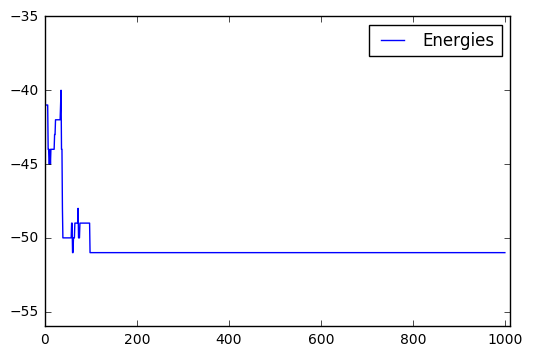

In [24]:
plt.plot(energies,
         label = "Energies")

plt.xlabel = "Energy"
plt.xlim(xmin = 0, xmax = NUM_OF_ITERATIONS+10)
plt.xscale("linear")

plt.ylabel = "Iteration"
plt.ylim(np.min(energies)-5, ymax = np.max(energies)+5)
plt.yscale("linear")

plt.grid = True

plt.legend()

plt.show()

In [25]:
print energies[0], energies[-1]

-42 -51


# Visualize the mutations

In [27]:
win = GraphWin("Monti Carlo Simulation (2D HP-Model)", win_length, win_width)

draw_interface(win)

display_text("Iteration: "+str(0), line=14)
display_text(mutation_type[0], line=16)
display_text("Energy: "+str(energies[0]), line=18)
draw_Chain(win, rpositions[0])
connect_residues(rpositions[0])
    
win.getMouse() # Pause to view result
win.close()    # Close window when done

In [29]:
win = GraphWin("Monti Carlo Simulation (2D HP-Model)", win_length, win_width)

draw_interface(win)

display_text("Iteration: "+str(len(energies)), line=14)
display_text(mutation_type[len(energies)-1], line=16)
display_text("Energy: "+str(energies[len(energies)-1]), line=18)
draw_Chain(win, rpositions[len(energies)-1])
connect_residues(rpositions[len(energies)-1])
    
win.getMouse() # Pause to view result
win.close()    # Close window when done

In [23]:
# win = GraphWin("Monti Carlo Simulation (2D HP-Model)", win_length, win_width)

# for iteration in range(0, NUM_OF_ITERATIONS, NUM_OF_ITERATIONS/10-1):
#     for i in range(10**7):
#         dummy=i # delay next mutation
    
#     clear = Rectangle(Point(0, 0), Point(win_length, win_width))
#     clear.setFill("White")
#     clear.draw(win)

#     draw_interface(win)
    
#     display_text("Iteration: "+str(iteration+1), line=14)
#     display_text(mutation_type[iteration], line=16)
#     display_text("Energy: "+str(energies[iteration]), line=18)
#     draw_Chain(win, rpositions[iteration])
#     connect_residues(rpositions[iteration])
    
# win.getMouse() # Pause to view result
# win.close()    # Close window when done